In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import SmartBrokerEnv
from agents.dqn import DQN
from networks.lstm_dueling import LSTMDueling

import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch

In [2]:
norm_cols = ['Volume XRP']
cols = ['date'] + ['open', 'high', 'low', 'close', f'Volume XRP']
batch_dur = 20
env = SmartBrokerEnv(
    batch_dur=batch_dur,
    df_info={
        'start_date': '2021-01-01',
        'end_date': '2021-02-01',
        'norm_cols': norm_cols,
        'cols': cols,
    },
    portfolio={

    },
)

/Users/vinay/miniforge3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/vinay/code/git/smart-broker/notebooks/../environment.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['rolling_price'] = self.df[self.price_typ].rolling(self.roll_period).sum()
/Users/vinay/miniforge3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [3]:
batch_size = 10
target_net = LSTMDueling(
    input_dim=batch_dur*3+3,
    output_dim=3,
)

policy_net = LSTMDueling(
    input_dim=batch_dur*3+3,
    output_dim=3,
)

dqn = DQN(
    env=env,
    env_type='vector',
    n_actions=3,
    log_freq=1,
    train_freq=3,
    batch_size=batch_size,
    w_sync_freq=1,
    memory_size=500,
    gamma=0.9995,
    step_size=0.01,
    episodes=500,
    target_net=target_net,
    policy_net=policy_net,
    loss_func=nn.SmoothL1Loss(),
    optimizer=torch.optim.Adam(policy_net.parameters(), lr=0.00008),
    load_pretrained=False,
    save_pretrained=False,
    model_path='../models/dqn_lstm',
    network_type='lstm',
)

dqn.run(5000)

collecting experience...

Ep: 0 | L: 70666.267 | R: -13.37 | R.Avg.R: -13.37 | P: 0.68 | R.Avg P: 0.68 | NW: 100.68 | R.Avg NW: 100.68 | R.N_Units: 201
Ep: 1 | L: 43350.38 | R: -11.47 | R.Avg.R: -12.74 | P: -6.15 | R.Avg P: -2.74 | NW: 93.85 | R.Avg NW: 97.26 | R.N_Units: 188
Ep: 2 | L: 80990.459 | R: -8.38 | R.Avg.R: -11.61 | P: -0.38 | R.Avg P: -1.95 | NW: 99.62 | R.Avg NW: 98.05 | R.N_Units: 190
Ep: 3 | L: 14814.878 | R: -8.38 | R.Avg.R: -10.69 | P: 22.36 | R.Avg P: 4.13 | NW: 122.36 | R.Avg NW: 104.13 | R.N_Units: 199
Ep: 4 | L: 9113.938 | R: -8.36 | R.Avg.R: -10.17 | P: 35.86 | R.Avg P: 10.47 | NW: 135.86 | R.Avg NW: 110.47 | R.N_Units: 208
Ep: 5 | L: 10708.802 | R: -8.28 | R.Avg.R: -9.84 | P: -5.58 | R.Avg P: 7.8 | NW: 94.42 | R.Avg NW: 107.8 | R.N_Units: 203
Ep: 6 | L: 11992.553 | R: -8.4 | R.Avg.R: -9.61 | P: 8.15 | R.Avg P: 7.85 | NW: 108.15 | R.Avg NW: 107.85 | R.N_Units: 202
Ep: 7 | L: 25578.053 | R: -8.44 | R.Avg.R: -9.45 | P: 2.43 | R.Avg P: 7.17 | NW: 102.43 | R.Avg NW: 1

KeyboardInterrupt: 

### Visualizations

### Traning

Text(0.5, 1.0, 'Rolling avg balance per episode')

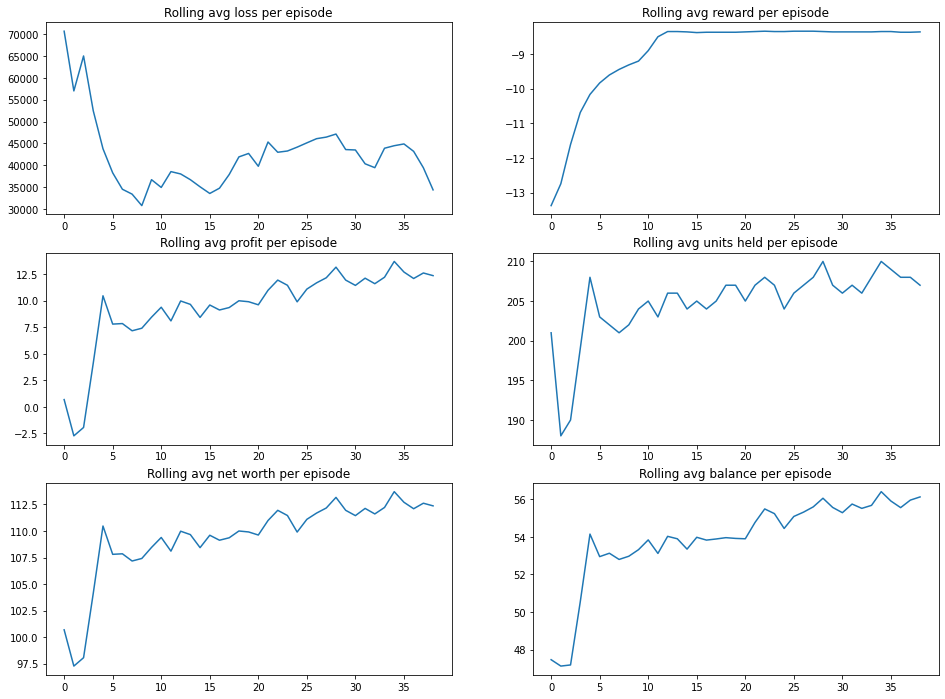

In [4]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
r_avg_units_held = []
r_avg_loss = []
r_avg_net_worth = []
count = 0

for _, log in dqn.logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    r_avg_units_held.append(log['r_avg_units_held'])
    r_avg_loss.append(log['r_avg_loss'])
    r_avg_net_worth.append(log['r_avg_net_worth'])
    count += 1

ax[0][0].plot(range(count), r_avg_loss)
ax[0][0].set_title('Rolling avg loss per episode')

ax[0][1].plot(range(count), r_avg_rewards)
ax[0][1].set_title('Rolling avg reward per episode')

ax[1][0].plot(range(count), r_avg_profits)
ax[1][0].set_title('Rolling avg profit per episode')

ax[1][1].plot(range(count), r_avg_units_held)
ax[1][1].set_title('Rolling avg units held per episode')

ax[2][0].plot(range(count), r_avg_net_worth)
ax[2][0].set_title('Rolling avg net worth per episode')

ax[2][1].plot(range(count), r_avg_bal)
ax[2][1].set_title('Rolling avg balance per episode')

In [6]:
# torch.save(dqn.target_net.state_dict(), '../models/dqn_d_lstm/target_net')
# torch.save(dqn.policy_net.state_dict(), '../models/dqn_d_lstm/policy_net')